# PriorSampler Test

This notebook tests the `PriorSampler` class for generating uncertain parameter field. 

## Uncertain parameter and covariance operator
Consider an uncertain field $w$ on $D = (0,1)^2$ with distribution $w \sim N(0, C)$, where $N(0,C)$ denotes the Gaussian normal distribution with the mean function being zero in $L^2(D, \mathbb{R})$ and $C: L^2(D; \mathbb{R}) \to L^2(D; \mathbb{R})$ is a covariance operator of the form $C = L_\Delta^{-2}$, where $L_\Delta: W_{L_\Delta} \subset W \to W$ is a Laplacian-like operator given by
\begin{equation}\tag{1}
    L_\Delta := \begin{cases}
        -\mathsf{a}_c \nabla \cdot \mathsf{b}_c \nabla + \mathsf{c}_c\,, \qquad\qquad  &  \text{in } D_w\,,\\
        \gamma n \cdot \mathsf{b}_c \nabla\,, \qquad \qquad & \text{on }\partial D_w\,.
    \end{cases}
\end{equation}
Here, $\mathsf{a}_c, \mathsf{b}_c, \mathsf{c}_c$ are parameters. For example, let
\begin{equation}\tag{1}
\mathsf{a} = 0.005\,, \quad \mathsf{c} = 0.2\,,
\end{equation}
and $\mathsf{b}$ be either constant $1$ or inhomogeneous field. 

In [1]:
import sys
import os
import time
import numpy as np
import dolfin as dl

src_path = "../src/"
sys.path.append(src_path + 'plotting')
from field_plot import field_plot, quick_field_plot

sys.path.append(src_path + 'pde')
sys.path.append(src_path + 'prior')
from priorSampler import PriorSampler

from fenicsUtilities import function_to_vertex

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# set seed
seed = 0
np.random.seed(seed)

In [2]:
data_folder = 'test_prior_sampler/'
current_directory = os.getcwd()  
results_dir = current_directory + '/' + data_folder
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Create PriorSampler model

a = 0.01, c = 0.2


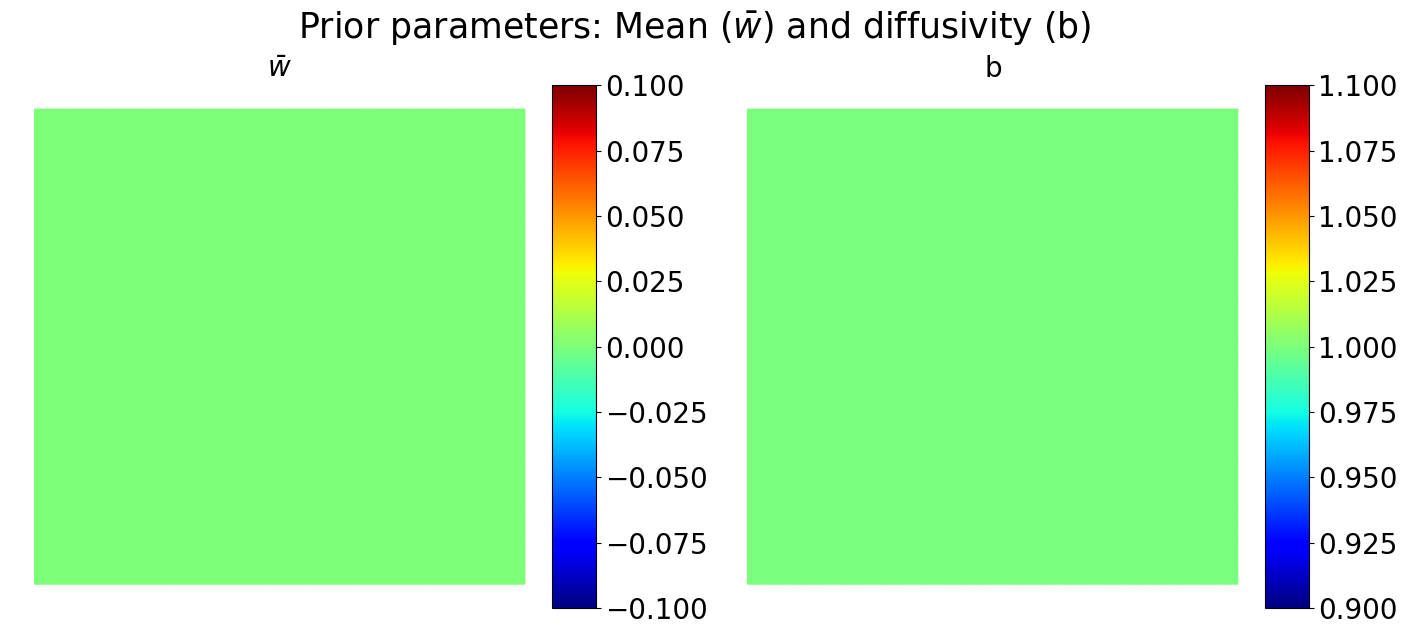

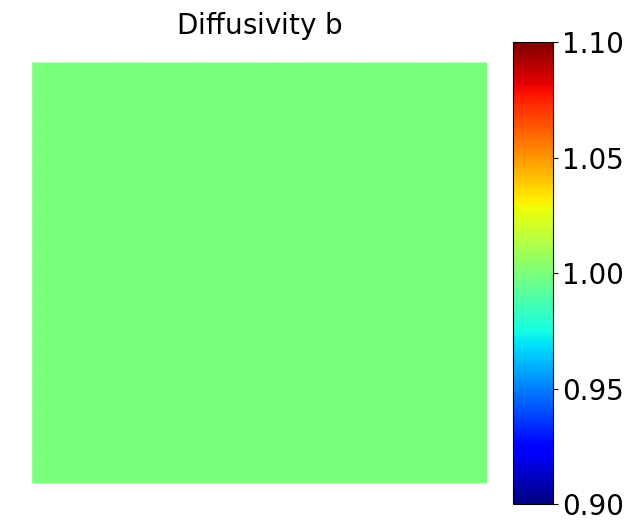

In [48]:
prior_ac = 0.01
prior_cc = 0.2
fe_order = 1
nx, ny = 50, 50

# create mesh
mesh = dl.UnitSquareMesh(nx, ny)
V = dl.FunctionSpace(mesh, "Lagrange", fe_order)

# create prior sampler
prior_sampler = PriorSampler(V, prior_ac, prior_cc)

print('a = {}, c = {}'.format(prior_sampler.a.values()[0], prior_sampler.c.values()[0]))

fs = 20
rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))
axs = np.array([axs]) if rows == 1 else axs
stats = []
m = prior_sampler.empty_sample()

for i in range(rows):
    for j in range(cols):
        
        m = prior_sampler.mean if j == 0 else function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical')

        axs[i,j].set_title(r'$\bar{w}$' if j == 0 else r'$\mathsf{b}$', fontsize=fs)
        axs[i,j].axis('off')

fig.tight_layout()
fig.suptitle(r'Prior parameters: Mean ($\bar{w}$) and diffusivity ($\mathsf{b}$)', fontsize=1.25*fs, y = 1.05)
plt.savefig(results_dir + 'const_b_prior_parameters.png',  bbox_inches='tight')
plt.show()

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), prior_sampler.V.mesh().coordinates(), title = r'Diffusivity $\mathsf{b}$', cmap ='jet', figsize=(7, 6), fs = 20, savefilename=results_dir + 'const_b.png')

## Generate random samples and plot

Sample:  0, log_prior = -7.09e-01, min = -1.50e-01, max = 2.11e-01, mean = 3.15e-02, std = 6.40e-02
Sample:  1, log_prior = -7.01e-01, min = -1.28e-01, max = 1.53e-01, mean = 2.77e-02, std = 4.60e-02
Sample:  2, log_prior = -7.16e-01, min = -1.68e-01, max = 1.41e-01, mean = -1.72e-03, std = 4.98e-02
Sample:  3, log_prior = -7.08e-01, min = -1.48e-01, max = 1.90e-01, mean = 1.31e-02, std = 6.23e-02
Sample:  4, log_prior = -6.86e-01, min = -1.57e-01, max = 1.96e-01, mean = 1.83e-02, std = 5.89e-02
Sample:  5, log_prior = -6.96e-01, min = -1.42e-01, max = 2.36e-01, mean = -1.47e-02, std = 6.98e-02
Sample:  6, log_prior = -7.04e-01, min = -2.41e-01, max = 1.65e-01, mean = 4.07e-02, std = 6.16e-02
Sample:  7, log_prior = -7.12e-01, min = -1.79e-01, max = 1.86e-01, mean = -2.98e-03, std = 5.89e-02
Sample:  8, log_prior = -7.00e-01, min = -1.26e-01, max = 2.22e-01, mean = 1.50e-02, std = 6.09e-02
Statistics of all samples
Mean: min = -1.60e-01, max = 1.89e-01, mean = 1.41e-02, std = 5.91e-02,

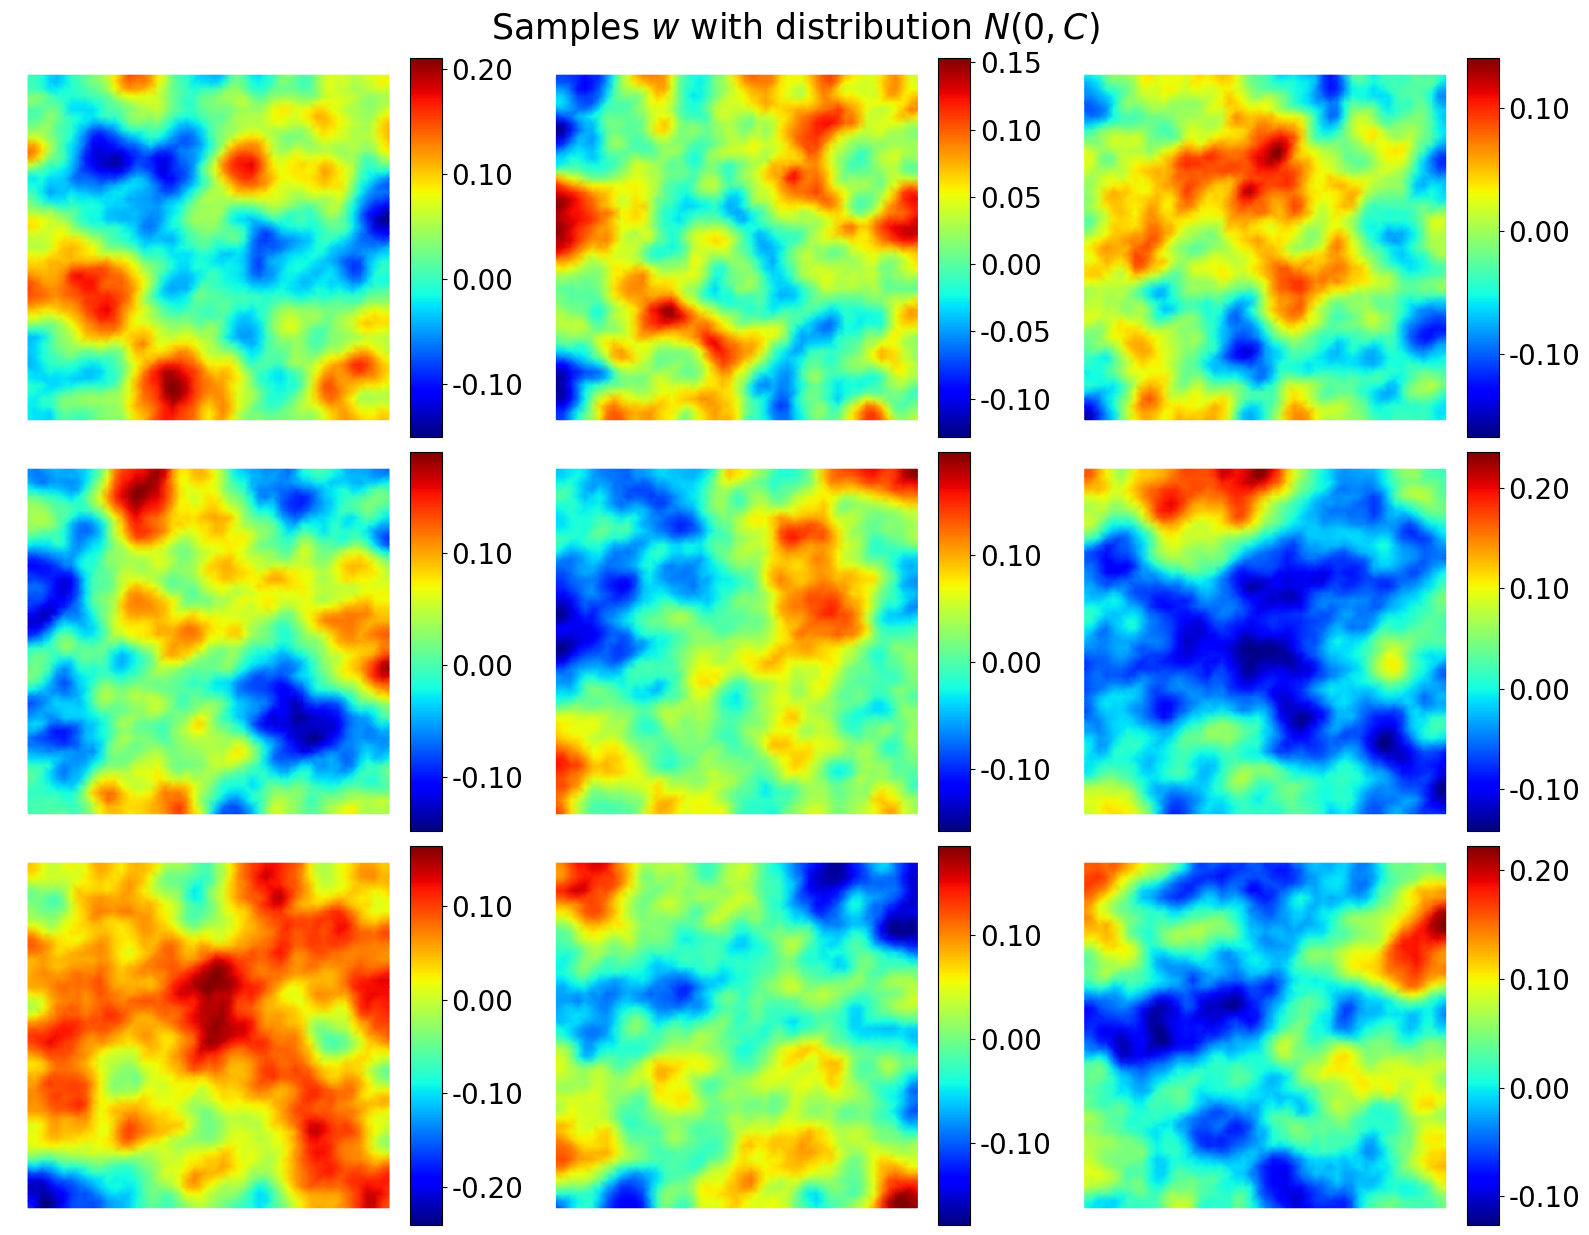

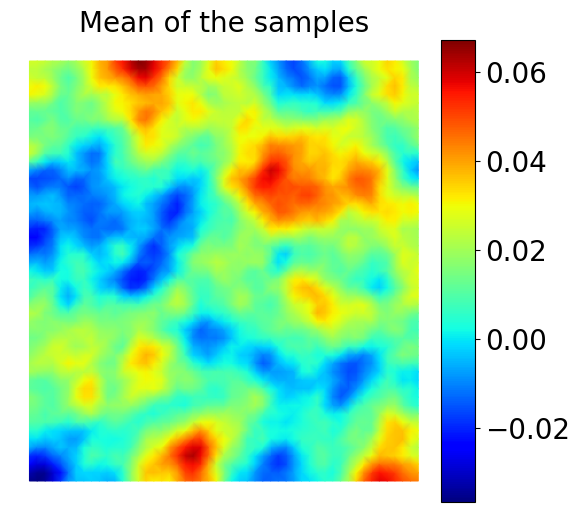

CPU times: user 48.3 s, sys: 92.5 ms, total: 48.4 s
Wall time: 4.08 s


In [40]:
%%time 

fs = 20
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
stats = []
mvec = []
m = prior_sampler.empty_sample() 
for i in range(rows):
    for j in range(cols):
        # draw a sample
        m, log_prior = prior_sampler(m)

        mvec.append(m)
        stats.append([np.min(m), np.max(m), np.mean(m), np.std(m), log_prior])
        print('Sample: {:2d}, log_prior = {:.2e}, min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}'.format(i*cols + j, log_prior, np.min(m), np.max(m), np.mean(m), np.std(m)))

        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)

        # format cbar ticks
        kfmt = lambda x, pos: "{:.2f}".format(x)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', format = kfmt)
        axs[i,j].axis('off')

# satistics
stats = np.array(stats)
print('Statistics of all samples')
print('Mean: min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}, log_prior = {:.2e}'.format(np.mean(stats[:,0]), np.mean(stats[:,1]), np.mean(stats[:,2]), np.mean(stats[:,3]), np.mean(stats[:,4])))

fig.tight_layout()
fig.suptitle(r'Samples $w$ with distribution $N(0,C)$', fontsize=1.25*fs, y = 1.025)
plt.savefig(results_dir + 'const_b_prior_samples.png',  bbox_inches='tight')
plt.show()

# compute mean sample field
mvec = np.array(mvec)
m = np.mean(mvec, axis=0)
quick_field_plot(m, prior_sampler.V.mesh().coordinates(), title='Mean of the samples', cmap ='jet')


## Test setting inhomogeneous diffusivity in prior covariance operator

In [41]:
def modify_diffusivity(u, V):
    coords = V.mesh().coordinates()
    xc, yc = 0.4, 0.6
    for i in range(coords.shape[0]):
        dx, dy = coords[i,0] - xc, coords[i,1] - yc
        if dx*dx + dy*dy < 0.25*0.25:
            # modify_ids.append(i)
            u[i] = 0.1
        else:
            u[i] = 1.
    return u

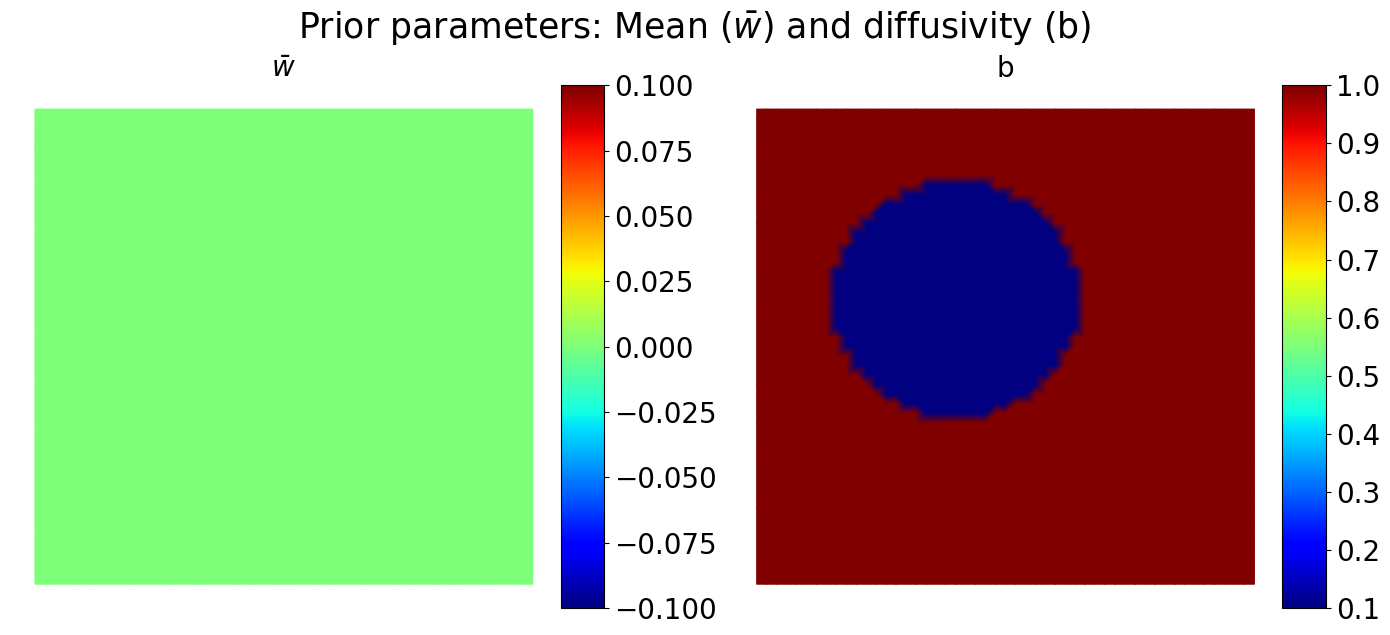

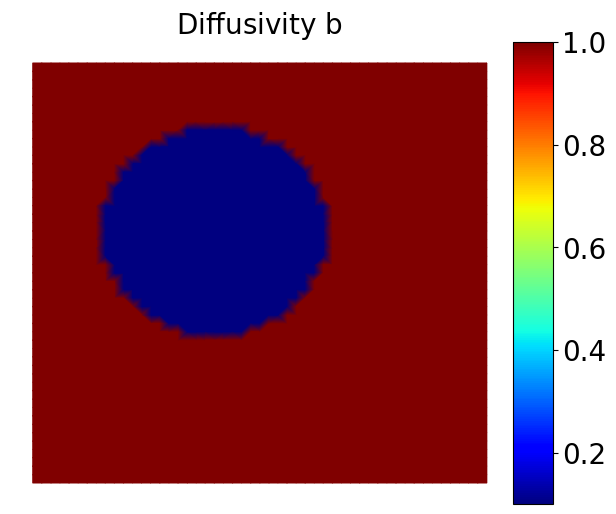

In [42]:
# set diffusion in prior
prior_diffusion = function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
prior_diffusion = modify_diffusivity(prior_diffusion, V)
prior_sampler.set_diffusivity(prior_diffusion)



fs = 20
rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))
axs = np.array([axs]) if rows == 1 else axs
stats = []
for i in range(rows):
    for j in range(cols):
        
        m = prior_sampler.mean if j == 0 else function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical')

        axs[i,j].set_title(r'$\bar{w}$' if j == 0 else r'$\mathsf{b}$', fontsize=fs)
        axs[i,j].axis('off')

fig.tight_layout()
fig.suptitle(r'Prior parameters: Mean ($\bar{w}$) and diffusivity ($\mathsf{b}$)', fontsize=1.25*fs, y = 1.05)
plt.savefig(results_dir + 'inhomog_b_prior_parameters.png',  bbox_inches='tight')
plt.show()

# quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), V.mesh().coordinates(), title = 'Prior diffusion', cmap ='jet')

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), prior_sampler.V.mesh().coordinates(), title = r'Diffusivity $\mathsf{b}$', cmap ='jet', figsize=(7, 6), fs = 20, savefilename=results_dir + 'inhomog_b.png')

Sample:  0, log_prior = -7.09e-01, min = -4.12e-01, max = 4.48e-01, mean = 2.37e-02, std = 7.66e-02
Sample:  1, log_prior = -7.14e-01, min = -4.66e-01, max = 5.25e-01, mean = 1.62e-03, std = 8.60e-02
Sample:  2, log_prior = -7.11e-01, min = -3.75e-01, max = 4.24e-01, mean = -1.40e-02, std = 9.33e-02
Sample:  3, log_prior = -7.13e-01, min = -3.56e-01, max = 5.59e-01, mean = 2.41e-02, std = 7.64e-02
Sample:  4, log_prior = -7.07e-01, min = -4.89e-01, max = 3.88e-01, mean = -7.44e-03, std = 8.56e-02
Sample:  5, log_prior = -6.87e-01, min = -3.69e-01, max = 5.95e-01, mean = 5.88e-03, std = 9.11e-02
Sample:  6, log_prior = -7.16e-01, min = -6.12e-01, max = 3.57e-01, mean = -1.30e-02, std = 8.41e-02
Sample:  7, log_prior = -7.08e-01, min = -4.07e-01, max = 4.98e-01, mean = -1.33e-02, std = 8.67e-02
Sample:  8, log_prior = -6.99e-01, min = -3.50e-01, max = 4.39e-01, mean = 1.76e-02, std = 7.92e-02
Statistics of all samples
Mean: min = -4.26e-01, max = 4.70e-01, mean = 2.80e-03, std = 8.43e-02

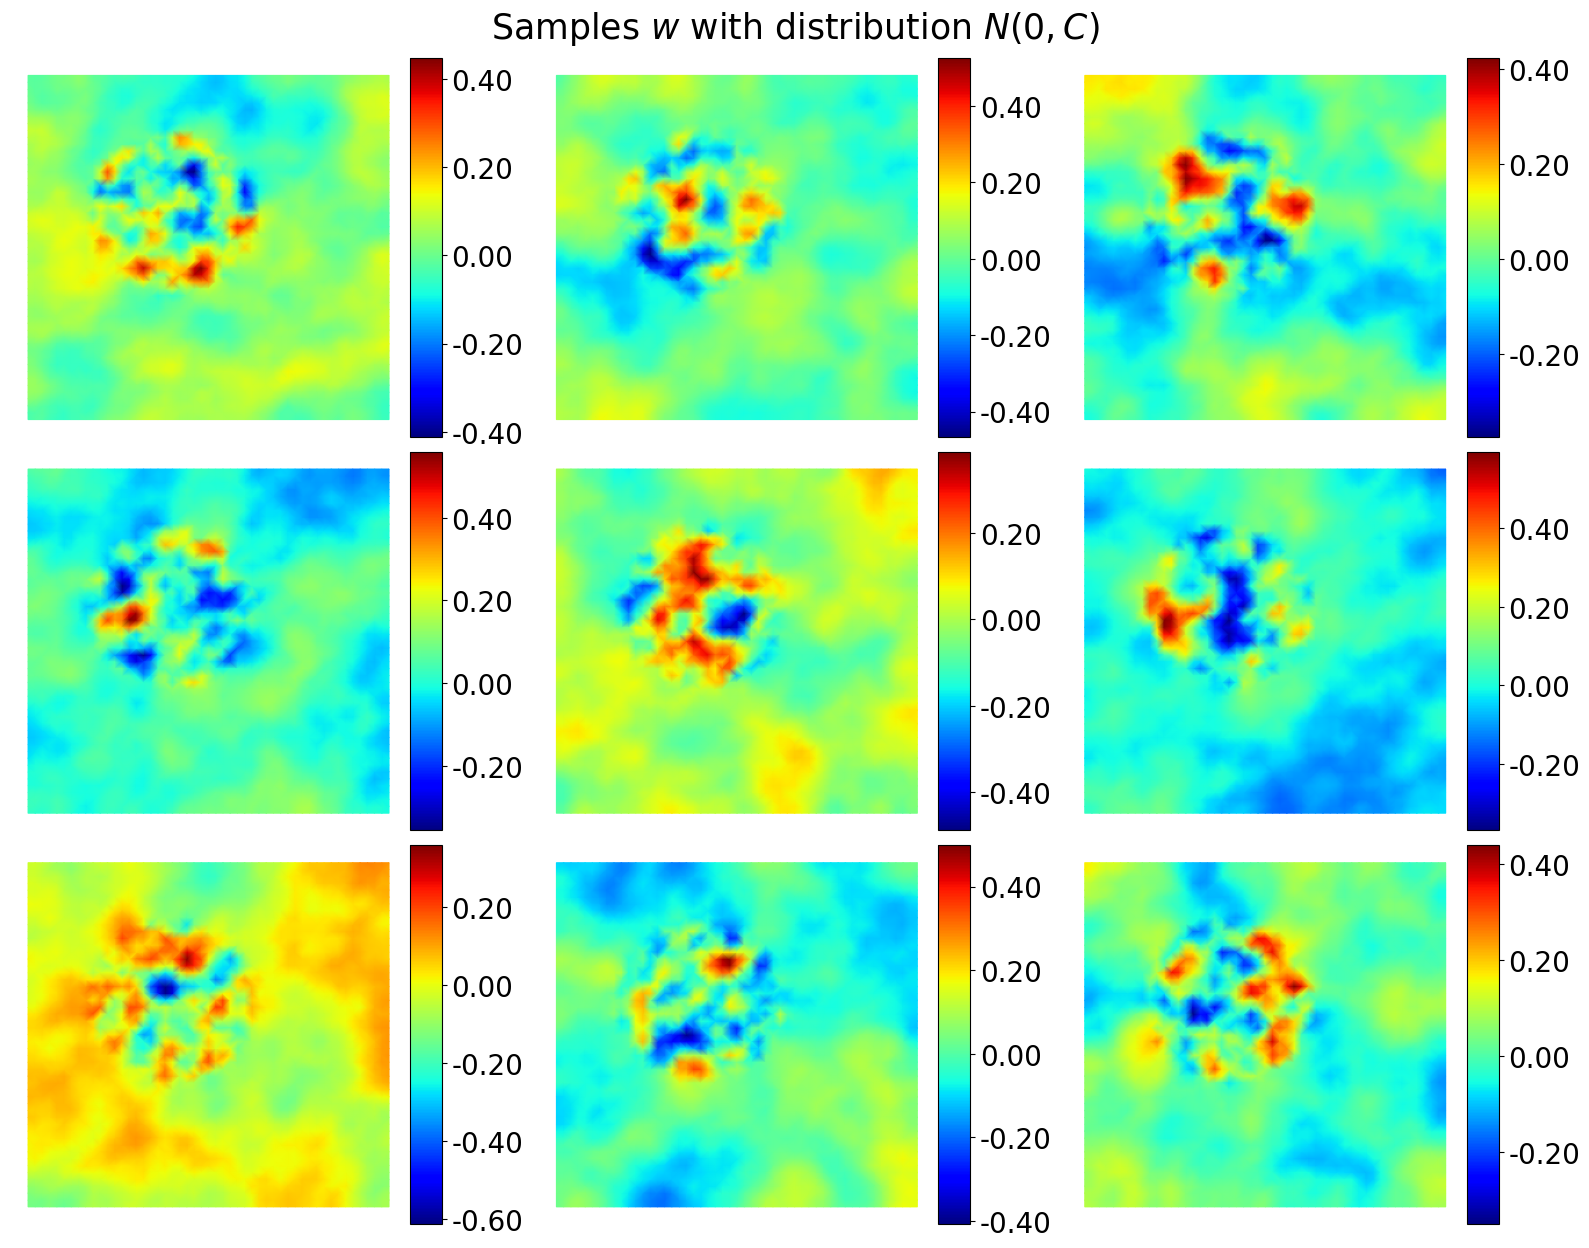

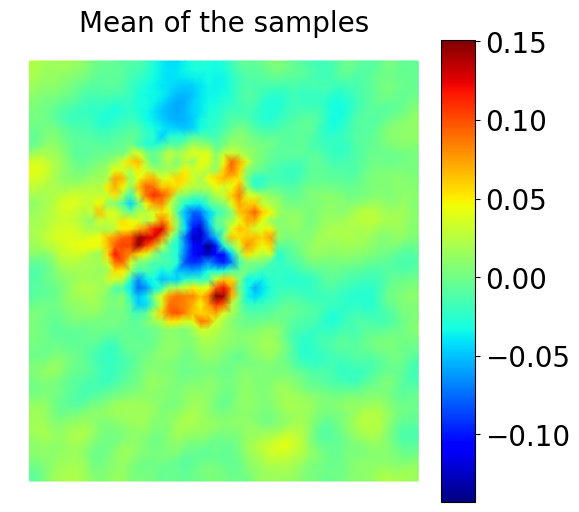

CPU times: user 46.2 s, sys: 112 ms, total: 46.3 s
Wall time: 3.87 s


In [43]:
%%time 

fs = 20
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
stats = []
mvec = []
m = prior_sampler.empty_sample() 
for i in range(rows):
    for j in range(cols):
        # draw a sample
        m, log_prior = prior_sampler(m)

        mvec.append(m)
        stats.append([np.min(m), np.max(m), np.mean(m), np.std(m), log_prior])
        print('Sample: {:2d}, log_prior = {:.2e}, min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}'.format(i*cols + j, log_prior, np.min(m), np.max(m), np.mean(m), np.std(m)))

        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)

        # format cbar ticks
        kfmt = lambda x, pos: "{:.2f}".format(x)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', format = kfmt)
        axs[i,j].axis('off')

# satistics
stats = np.array(stats)
print('Statistics of all samples')
print('Mean: min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}, log_prior = {:.2e}'.format(np.mean(stats[:,0]), np.mean(stats[:,1]), np.mean(stats[:,2]), np.mean(stats[:,3]), np.mean(stats[:,4])))

fig.tight_layout()
fig.suptitle(r'Samples $w$ with distribution $N(0,C)$', fontsize=1.25*fs, y = 1.025)
plt.savefig(results_dir + 'inhomog_b_prior_samples.png',  bbox_inches='tight')
plt.show()

# compute mean sample field
mvec = np.array(mvec)
m = np.mean(mvec, axis=0)
quick_field_plot(m, prior_sampler.V.mesh().coordinates(), title='Mean of the samples', cmap ='jet')

### Revert diffusivity in prior covariance operator back to constant 1

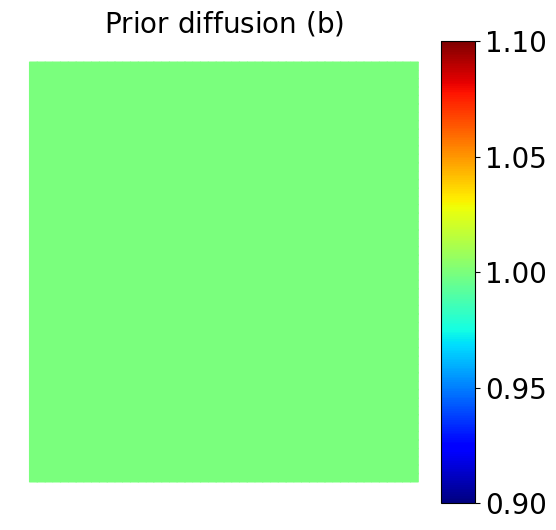

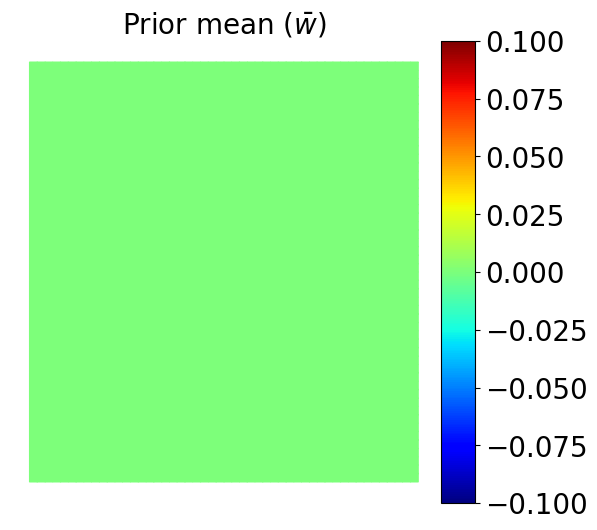

In [44]:
prior_diffusion[:] = 1.
prior_sampler.set_diffusivity(prior_diffusion)

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), V.mesh().coordinates(), title = r'Prior diffusion ($\mathsf{b}$)')

quick_field_plot(prior_sampler.mean, V.mesh().coordinates(), title= r'Prior mean ($\bar{w}$)')


# Try smooth diffusivity

In [49]:
def modify_diffusivity_smooth(u, V):
    xc, yc, r = 0.45, 0.55, 0.3
    n = 2
    vin, vout = 0.2, 1
    a, b = vin, -np.log(vout/vin)
    tol = 1.e-12


    coords = V.mesh().coordinates()
    for i in range(coords.shape[0]):
        x = coords[i]
        # check relative position of point x
        xx, yy = x[0] - xc, x[1] - yc
        # f = (r*r - xx*xx - yy*yy)/(r*r)
        f = np.sqrt(xx*xx + yy*yy) / r
        f = np.power(f, n)
        
        # set values
        if f < 1.+tol:
            # return -0.2*(2*check + 1)
            u[i] = a*np.exp(-b*f*f)
        else:
            u[i] = vout
    return u

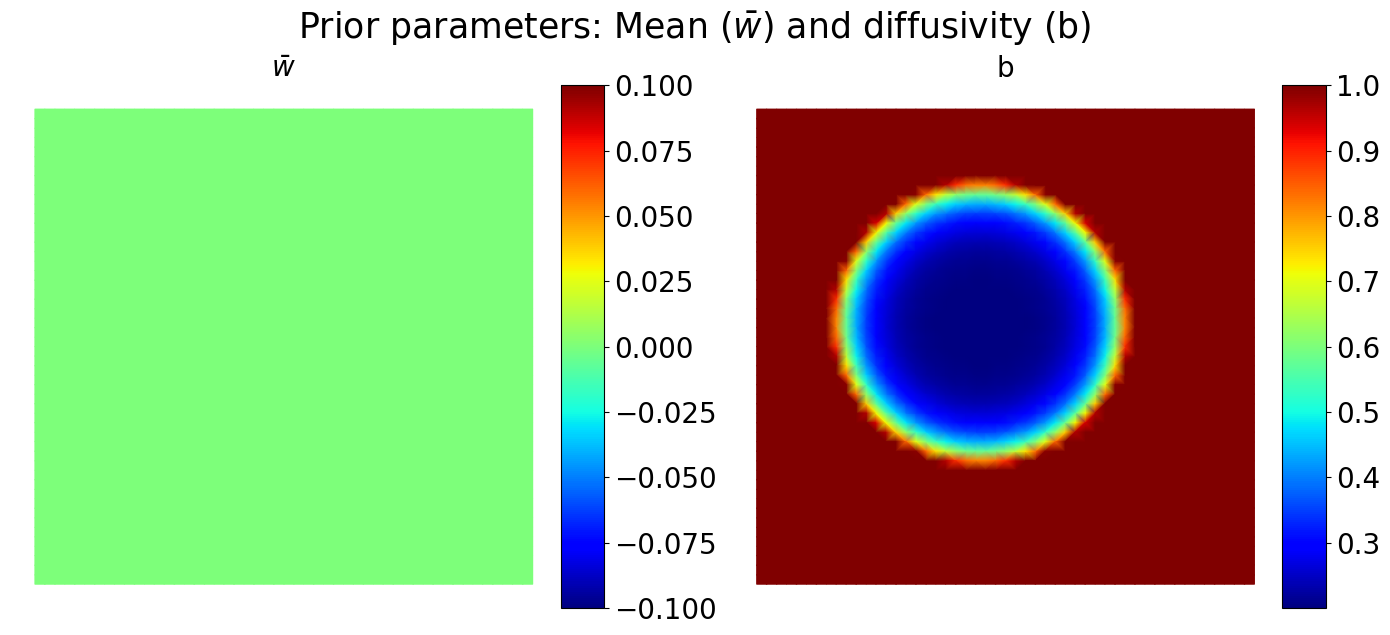

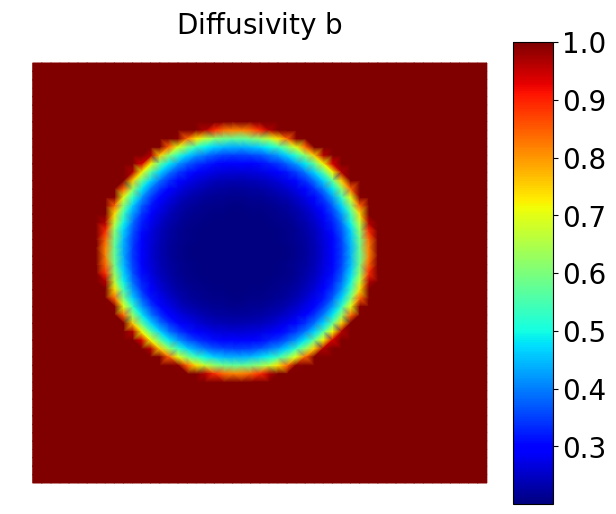

In [50]:
# set diffusion in prior
prior_diffusion = function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
prior_diffusion = modify_diffusivity_smooth(prior_diffusion, V)
prior_sampler.set_diffusivity(prior_diffusion)


fs = 20
rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))
axs = np.array([axs]) if rows == 1 else axs
stats = []
for i in range(rows):
    for j in range(cols):
        
        m = prior_sampler.mean if j == 0 else function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical')

        axs[i,j].set_title(r'$\bar{w}$' if j == 0 else r'$\mathsf{b}$', fontsize=fs)
        axs[i,j].axis('off')

fig.tight_layout()
fig.suptitle(r'Prior parameters: Mean ($\bar{w}$) and diffusivity ($\mathsf{b}$)', fontsize=1.25*fs, y = 1.05)
plt.savefig(results_dir + 'smooth_b_prior_parameters.png',  bbox_inches='tight')
plt.show()

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), prior_sampler.V.mesh().coordinates(), title = r'Diffusivity $\mathsf{b}$', cmap ='jet', figsize=(7, 6), fs = 20, savefilename=results_dir + 'smooth_b.png')

# quick_field_plot(prior_sampler.mean.compute_vertex_values(), V.mesh().coordinates(), title='Prior mean', cmap ='jet')

Sample:  0, log_prior = -7.06e-01, min = -5.24e-01, max = 2.84e-01, mean = -8.30e-02, std = 1.52e-01
Sample:  1, log_prior = -7.19e-01, min = -5.35e-01, max = 5.34e-01, mean = 6.96e-02, std = 1.52e-01
Sample:  2, log_prior = -6.99e-01, min = -6.22e-01, max = 3.93e-01, mean = -1.18e-02, std = 1.45e-01
Sample:  3, log_prior = -7.07e-01, min = -4.79e-01, max = 4.10e-01, mean = -2.04e-02, std = 1.55e-01
Sample:  4, log_prior = -7.03e-01, min = -4.13e-01, max = 7.95e-01, mean = -3.30e-02, std = 2.20e-01
Sample:  5, log_prior = -7.11e-01, min = -3.08e-01, max = 7.88e-01, mean = 1.39e-01, std = 2.15e-01
Sample:  6, log_prior = -7.00e-01, min = -3.59e-01, max = 3.44e-01, mean = 7.00e-02, std = 1.19e-01
Sample:  7, log_prior = -7.06e-01, min = -5.95e-01, max = 4.18e-01, mean = -7.19e-02, std = 1.77e-01
Sample:  8, log_prior = -7.11e-01, min = -5.26e-01, max = 2.80e-01, mean = -9.32e-02, std = 1.59e-01
Statistics of all samples
Mean: min = -4.84e-01, max = 4.72e-01, mean = -3.86e-03, std = 1.66e

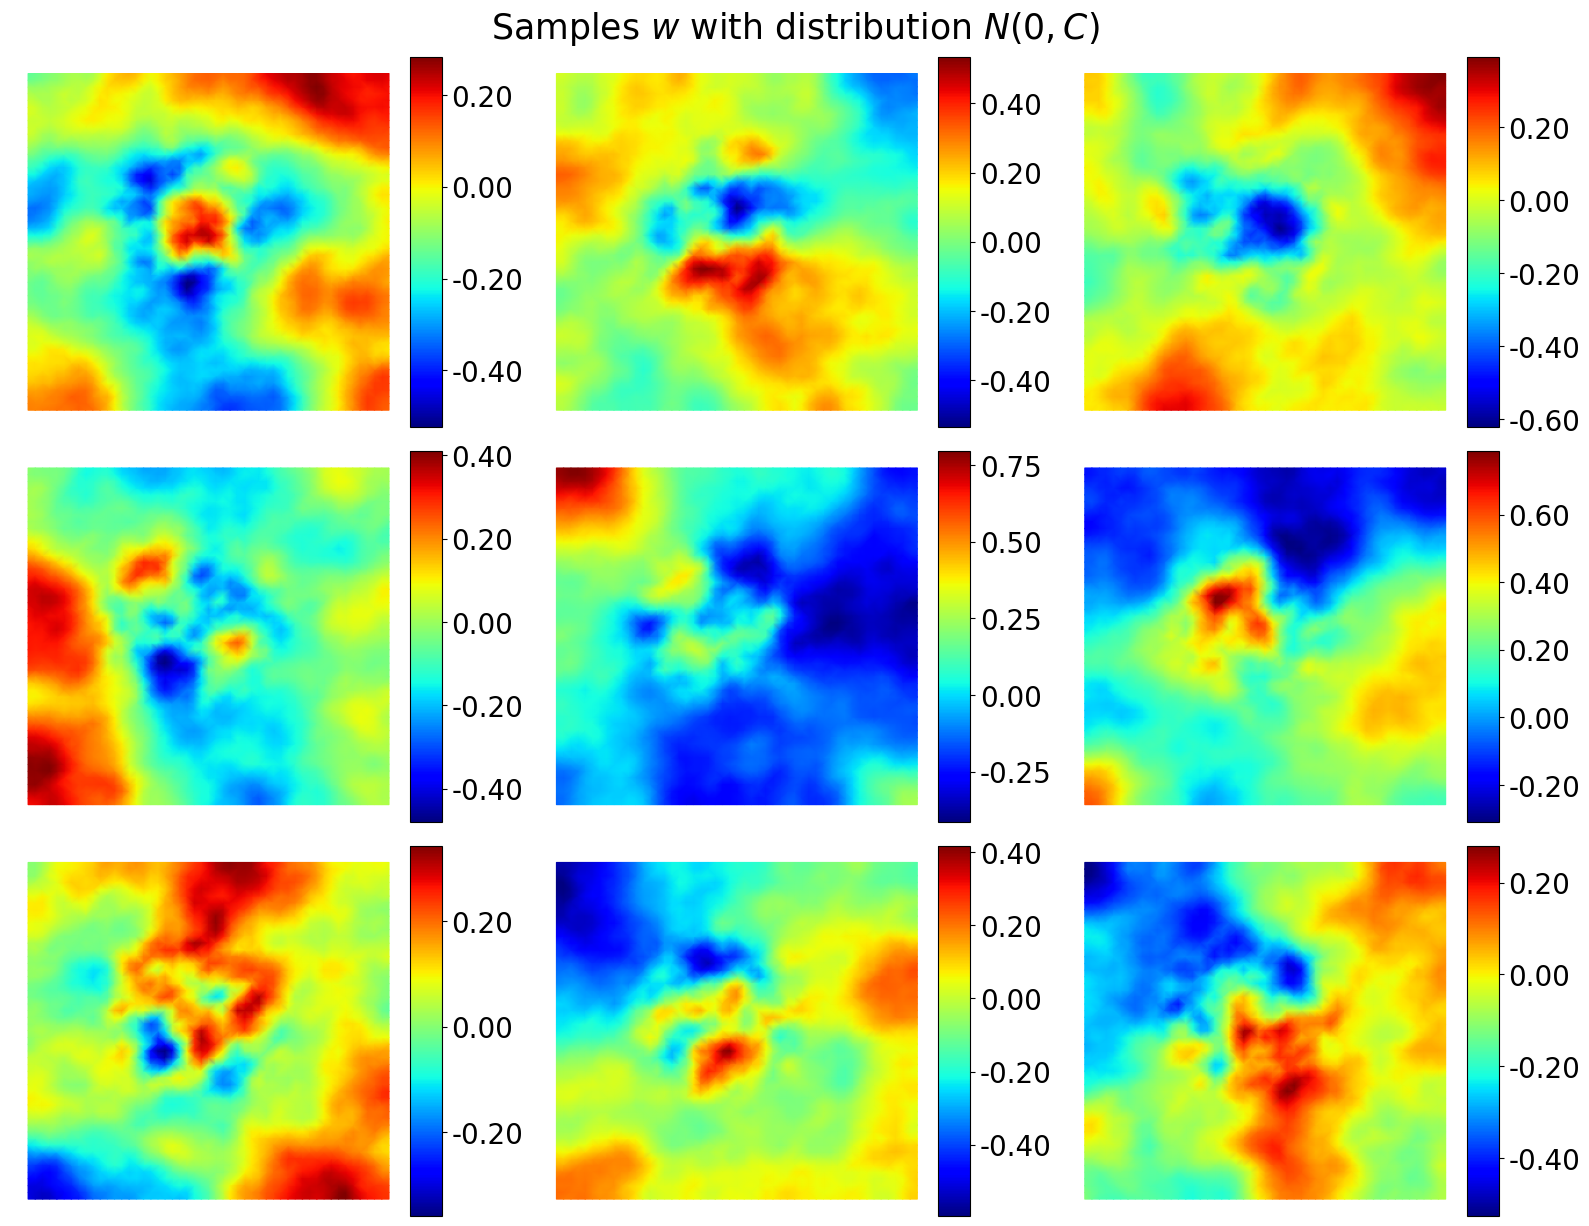

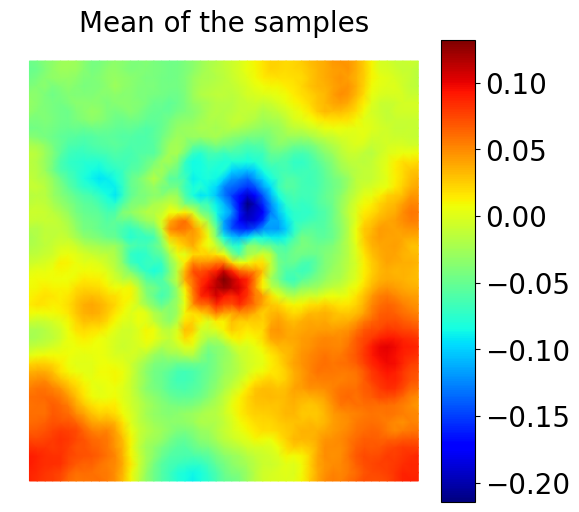

CPU times: user 45.8 s, sys: 91.4 ms, total: 45.9 s
Wall time: 3.95 s


In [51]:
%%time 

fs = 20
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
stats = []
mvec = []
m = prior_sampler.empty_sample() 
for i in range(rows):
    for j in range(cols):
        # draw a sample
        m, log_prior = prior_sampler(m)

        mvec.append(m)
        stats.append([np.min(m), np.max(m), np.mean(m), np.std(m), log_prior])
        print('Sample: {:2d}, log_prior = {:.2e}, min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}'.format(i*cols + j, log_prior, np.min(m), np.max(m), np.mean(m), np.std(m)))

        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)

        # format cbar ticks
        kfmt = lambda x, pos: "{:.2f}".format(x)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', format = kfmt)
        axs[i,j].axis('off')

# satistics
stats = np.array(stats)
print('Statistics of all samples')
print('Mean: min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}, log_prior = {:.2e}'.format(np.mean(stats[:,0]), np.mean(stats[:,1]), np.mean(stats[:,2]), np.mean(stats[:,3]), np.mean(stats[:,4])))

fig.tight_layout()
fig.suptitle(r'Samples $w$ with distribution $N(0,C)$', fontsize=1.25*fs, y = 1.025)
plt.savefig(results_dir + 'smooth_b_prior_samples.png',  bbox_inches='tight')
plt.show()

# compute mean sample field
mvec = np.array(mvec)
m = np.mean(mvec, axis=0)
quick_field_plot(m, prior_sampler.V.mesh().coordinates(), title='Mean of the samples', cmap ='jet')
